# 02. Neural Network classification with PyTorch 

Classification is a problem of predicting whether something is one thing or another (there can be multiple thing as the options)

## 1. Make classification data and get it ready

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                   noise = 0.03, 
                   random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 sample of X:\n {X[:5]}")
print(f"First 5 sample of y:\n {y[:5]}")

First 5 sample of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 sample of y:
 [1 1 1 1 0]


In [5]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1" : X[:,0],
                        "X2" : X[:,1],
                       "label" : y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [6]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

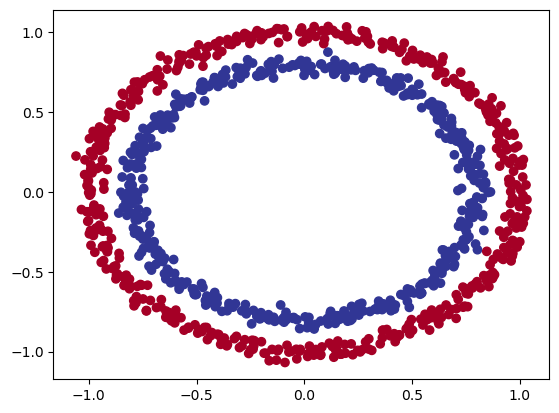

In [7]:
# visualize, visulize, visulize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0], 
           y=X[:,1], 
           c=y,
           cmap=plt.cm.RdYlBu);

 Note: The data we're working is often referred to as a **toy dataset**, a dataset that is small enough to experiment but still sizeble to practice the fundamentals.

## 1.1 Check input and output shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [10]:
# view the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one example of X:{X_sample} and same for y: {y_sample}")
print(f"Sample for one sample of X: {X_sample.shape} and the sample for y: {y_sample.shape}")

Values for one example of X:[0.75424625 0.23148074] and same for y: 1
Sample for one sample of X: (2,) and the sample for y: ()


## 1.2 Turn data into tensors and create train and test splits

In [11]:
import torch 
torch.__version__

'1.12.1'

In [12]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [13]:
# Turn data into tensors 
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [14]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [15]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [16]:
# Split data into training and test sets 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [17]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [18]:
n_samples

1000

## 2. Building a model

Let's build a modelto classify our blue and red dots.

To do so, we want to:
1. Setup device agonistic code so our code will run on an accelarator(GPU) if there is one 
2. Construct a model (by subclassing 'nn.Module')
3. Define a loss function and optimizer
4. Create a training and testing loop

In [19]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [20]:
X_train, X_train.shape

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         ...,
         [ 0.0157, -1.0300],
         [ 1.0110,  0.1680],
         [ 0.5578, -0.5709]]),
 torch.Size([800, 2]))

Now we've setup device agnostic code, Lets create a model that:

1. Subclasses nn.Module (almost all models in PyTorch subclass nn.Module)
2. Create 2 nn.Linear() layers that are capable of handiling the shape of our data
3. Defines a forward() method that outlines the forward pass (or forward computation) of the model 
4. Instatiate an instance of our model class and it to the target device

In [21]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features 
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single features(same shape as y)
        
        # Define a forward() method that outlines the forward pass
        def forward(self, x):
            return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of our model class and send it to the target device 
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
device

'cpu'

In [23]:
next(model_0.parameters()).device # our model parameters is on cpu device

device(type='cpu')

In [24]:
# Let's replacible the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features = 5), 
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [25]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2334, -0.1855],
                      [-0.5100,  0.5638],
                      [-0.4124, -0.0221],
                      [ 0.2792, -0.5065],
                      [-0.4975, -0.3347]])),
             ('0.bias', tensor([ 0.0379,  0.5245, -0.5089, -0.5649, -0.2892])),
             ('1.weight',
              tensor([[ 0.2420,  0.2536, -0.3563, -0.2688,  0.0354]])),
             ('1.bias', tensor([0.0280]))])

In [26]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 predictions:\n{y_test[:10]}")

Length of predictions: 200, shape: torch.Size([200, 1])
Length of test samples: 200, shape: torch.Size([200, 2])

First 10 predictions:
tensor([[0.6996],
        [0.7121],
        [0.5131],
        [0.7531],
        [0.2689],
        [0.2784],
        [0.5071],
        [0.4049],
        [0.5237],
        [0.7102]])

First 10 predictions:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [27]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

## 2.1 setup loss function and optimizer 

which loss function or optimizer should you use ?

Again... this is problem specific.

For example for regression you might want MAE or MSE(mean absolute error or mean square error). 

For classicfiction you want binary cross entropy or categorical cross entropy (cross entropy).

Loss function - the loss function measures how **wrong** your model predictions are.

and for optimizer, two of the most common and useful are SGD and adam, However PyTorch has many built-in options.

-> For the loss function we're going use **torch.nn.BECWithLogitsLoss()**

In [28]:
# Setup the loss function 
# nn.BCELoss() requires input to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.1)

In [29]:
# calculate accuracy - out of 100 examples what percentage does our model get right ?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

## 3. Train model

To trin our model, we're going to need to build a traing loop with following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradint descent)

**Logits** - In context of deep learning logits layers are that feeds in to softmax. The output of softmax are probabilites are the classification task and its output of logits layer

## 3.1 Going from raw logits -> prediction probabilites -> prediction labels

our model output are going to be raw **logit**

we can convert these **Logits** into **prediction probabilites** by passing them to some kind of activation function (sigmoid -> binary classifiction, softmax -> multiclass classifiction)

Then we can convert our model's prediction probabitites to **predicion label** by either rounding them or taking the **argmax()**.

In [30]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits 

tensor([[0.6996],
        [0.7121],
        [0.5131],
        [0.7531],
        [0.2689]])

In [31]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [32]:
# Use the sigmoid activation function on our model logits to turn them into predition probabilites
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6681],
        [0.6709],
        [0.6255],
        [0.6799],
        [0.5668]])

We need to perform a range -style rouning on them:

* y_pred_probs >= 0.5, y=1 (class 1)
* y_pred_probs < 0.5, y=0 (class 0)

In [33]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probls -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for quality 
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.])

## 3.2 Building a training and testing loop 

In [34]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build trainig and evaluation loop 
for epoch in range(epochs):
    ### Training 
    model_0.train()
    
    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels
    
    # 2. Calculate loss/accuarcy 
    
#     loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilites as input
#                   y_train)  
    loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input 
                  y_train)
    acc = accuracy_fn(y_true=y_train,
                     y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward (backpropagation)
    loss.backward()
    
    # 5. Optimizer step (gradint descent)
    optimizer.step()
    
    
    ### Testing 
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits, 
                           y_test)
        test_acc = accuracy_fn(y_true=y_test,
                              y_pred=test_pred)
        
    # Print out whats happenin 
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss}, acc: {acc:.2f}% | Test loss: {test_loss:.2f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.7253190875053406, acc: 50.00% | Test loss: 0.73, Test acc: 50.00%
Epoch: 10 | Loss: 0.7038780450820923, acc: 50.00% | Test loss: 0.71, Test acc: 50.00%
Epoch: 20 | Loss: 0.6969808340072632, acc: 50.00% | Test loss: 0.70, Test acc: 50.00%
Epoch: 30 | Loss: 0.6946229338645935, acc: 59.13% | Test loss: 0.70, Test acc: 57.00%
Epoch: 40 | Loss: 0.693770170211792, acc: 52.62% | Test loss: 0.69, Test acc: 53.00%
Epoch: 50 | Loss: 0.6934366822242737, acc: 52.00% | Test loss: 0.69, Test acc: 52.50%
Epoch: 60 | Loss: 0.693289577960968, acc: 51.50% | Test loss: 0.69, Test acc: 52.50%
Epoch: 70 | Loss: 0.6932128667831421, acc: 50.75% | Test loss: 0.69, Test acc: 50.00%
Epoch: 80 | Loss: 0.6931654214859009, acc: 50.75% | Test loss: 0.69, Test acc: 49.00%
Epoch: 90 | Loss: 0.6931318640708923, acc: 50.88% | Test loss: 0.69, Test acc: 48.50%


## 4. Make predictions and evaluate the model

From the matrics it looks like our model isn't learning anything...

So, to inspact it let's make predictions and make them visual:

In other words, "Visualize, visualize, visualize:"

To do so, we're going to import a function called 'plot_decision_boundary()'

In [35]:
import requests 
from pathlib import Path

# Downloard helper fuctions from Learn Pytorch repo (if it's not downloarded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
        
from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


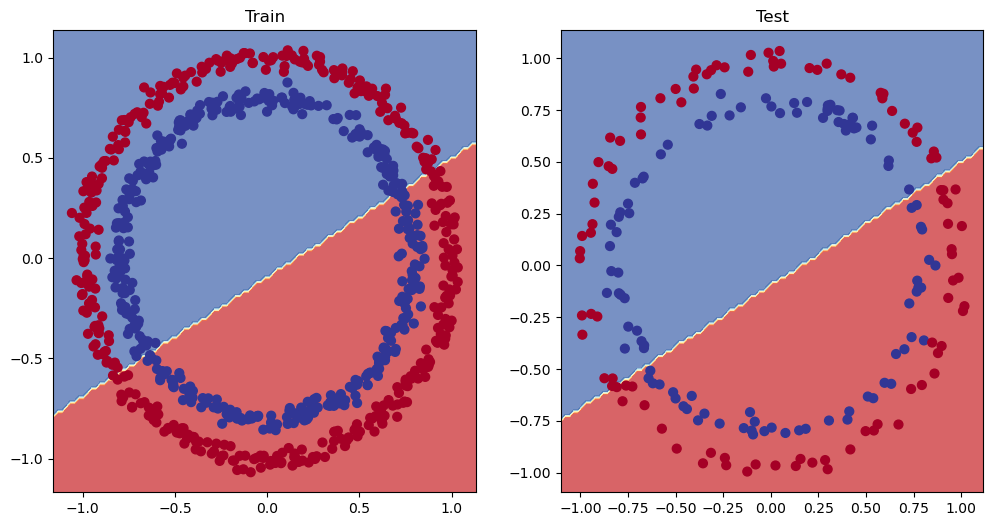

In [36]:
# Plot decisoin boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layers give the model more chances to learn about pattenrns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Changing/add th activation functions
* Changing the optimization function 
* Changing the learning rate
* Change the loss function 
* Fittig for longer (Increase epoches)

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we can change, they are referred as ***hyperparameters***.

(hyperparameters= these values that we can change)

Improve our model:  Adding more layers 5 -> 10
                    Increase the number of layers 2-> 3
                    Increase the number of epoch 100 -> 1000
                    

In [37]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x):
#         z = self.layer_1(x)
#         z = self.layer_2(z)
#         z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x))) 

model_1 = CircleModelV1().to(device)  # Crete instance model_1
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [38]:
# Create a loss function
loss_fn2 = nn.BCEWithLogitsLoss()

# Create a optimzer 
optimizer = torch.optim.SGD(params=model_1.parameters(),
                           lr=0.1)

In [39]:
# Write a traing and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for loop 
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training 
    model_1.train()
    
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilites -> prediction labels
    
    # 2. Calculate the loss/acc
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                     y_pred = y_pred)
    
    # 3. Optimzer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backwards (backpropagation) 
    loss.backward()
    
    # 5. opimizer step(gradient descent)
    optimizer.step()
    
    ### Testing 
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass 
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Calculate loss
        test_loss = loss_fn(test_logits, 
                            y_test)
        test_acc = accuracy_fn(y_true = y_test,
                              y_pred=test_pred)
        
    # Print out what's happenin'
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} , Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test acc: {test_acc:.5f}%")
        

Epoch: 0 | Loss: 0.69396 , Acc: 50.88% | Test Loss: 0.69261, Test acc: 51.00000%
Epoch: 100 | Loss: 0.69305 , Acc: 50.38% | Test Loss: 0.69379, Test acc: 48.00000%
Epoch: 200 | Loss: 0.69299 , Acc: 51.12% | Test Loss: 0.69437, Test acc: 46.00000%
Epoch: 300 | Loss: 0.69298 , Acc: 51.62% | Test Loss: 0.69458, Test acc: 45.00000%
Epoch: 400 | Loss: 0.69298 , Acc: 51.12% | Test Loss: 0.69465, Test acc: 46.00000%
Epoch: 500 | Loss: 0.69298 , Acc: 51.00% | Test Loss: 0.69467, Test acc: 46.00000%
Epoch: 600 | Loss: 0.69298 , Acc: 51.00% | Test Loss: 0.69468, Test acc: 46.00000%
Epoch: 700 | Loss: 0.69298 , Acc: 51.00% | Test Loss: 0.69468, Test acc: 46.00000%
Epoch: 800 | Loss: 0.69298 , Acc: 51.00% | Test Loss: 0.69468, Test acc: 46.00000%
Epoch: 900 | Loss: 0.69298 , Acc: 51.00% | Test Loss: 0.69468, Test acc: 46.00000%


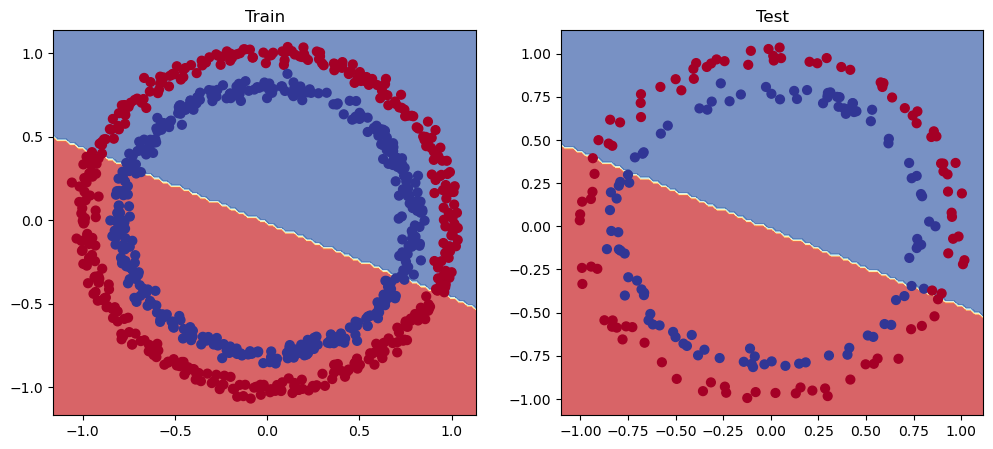

In [40]:
# Plot decisoin boundary of the model
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## 5.1 Preparing data to see if our model can fit a straight line 

One way to troubleshoot to  a large problem is to test out a smaller problem.

In [41]:
# Crate some data (same as notebook 01)
weight = 0.7 
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data 
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight*X_regression + bias # Linear Regression formula (without epsilon)

# Check the data 
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [42]:
# Crate train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check lengths of each 
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

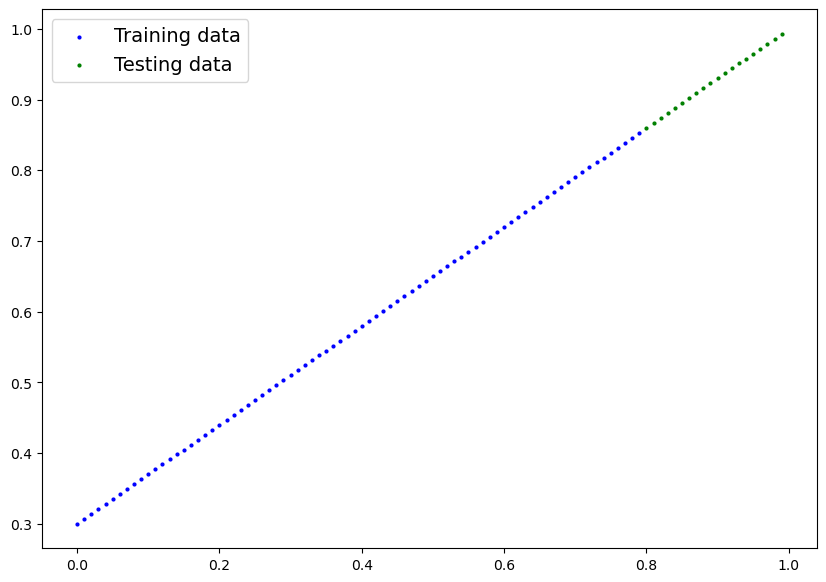

In [43]:
plot_predictions(train_data= X_train_regression,
                train_labels= y_train_regression,
                test_data = X_test_regression,
                test_labels = y_test_regression);

In [44]:
X_train_regression[:5], y_train_regression[:5] 

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

### Note: Here in_feature is one and our model_1 's in_feature is 2 

Let's Adjusting model_1's in_features = 1

## 5.2 Adjusting 'Model_1' to fit a straight line

In [45]:
# Same architecture as model_1 (but using nn.sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [46]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                           lr=0.01)

In [47]:
# Train the model 
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs 
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Trianing 
for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Testing 
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
        
    # Print out whats happenin
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test loss: 0.00360


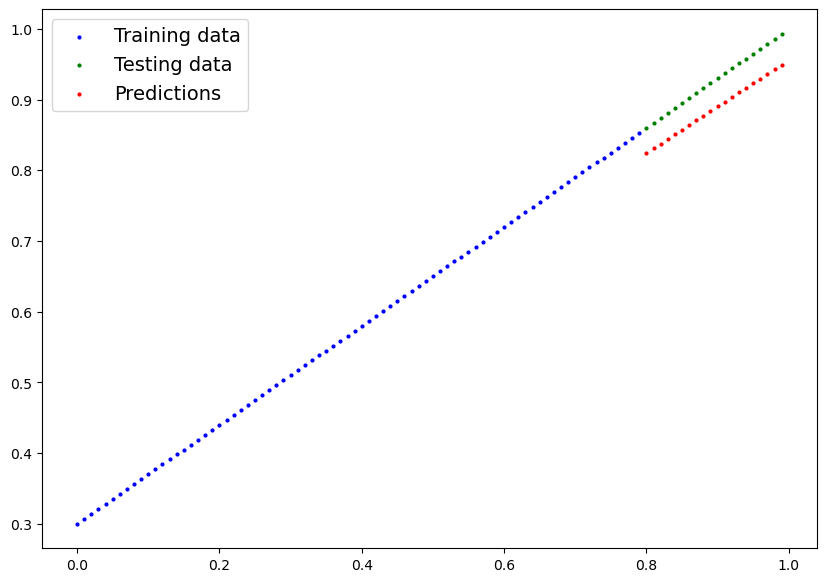

In [48]:
# Turn on evalution mode
model_2.eval()

# Make prediction 
with torch.inference_mode():
    y_preds = model_2(X_test_regression)
    
# Plot data and predictions
plot_predictions(train_data = X_train_regression, 
                train_labels=y_train_regression,
                test_data = X_test_regression,
                test_labels = y_test_regression,
                predictions = y_preds);

## 6. The missing piece: non-linearity 

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

or in machine learning term, an infinite (but really it is finite) of linear and non-linear functions?

### 6.1 Recreating non-linear data(red and blue circles)

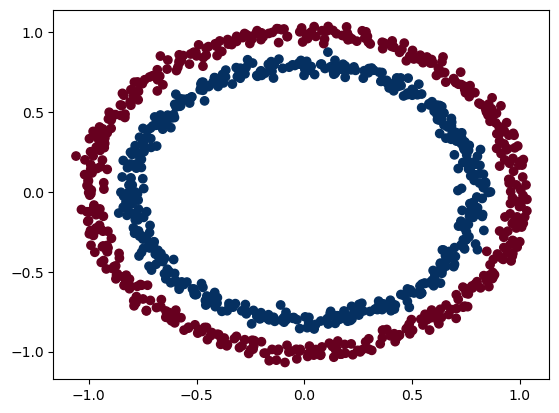

In [49]:
# Make and plot data 
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, 
                   noise= 0.03, 
                   random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdBu);

In [50]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train test sets 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y, 
                                                   test_size=0.2, 
                                                   random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity 

* Linear = straight linear
* Non-linear = non_straight lines


In [51]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # relu is a non-linar activaion function 
        
    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [52]:
# Loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()

# optimizer 
optimizer = torch.optim.SGD(model_3.parameters(), 
                           lr=0.1)

### 6.3 Training a model with non-linearity

In [53]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data 
epochs = 1000

for epoch in range(epochs):
    ### Training 
    model_3.train()
    
    # 1. Forward pass 
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels 
    
    # 3. calculate the loss 
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes in logits as first input)
    acc = accuracy_fn(y_true= y_train,
                     y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Step the optimizer
    optimizer.step()
    
    
    ### Testing 
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                              y_pred = test_pred)
    # Print out what's happenin 
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6929, Acc: 50.00% | Test Loss: 0.693188, Test Acc: 50.00%
Epoch: 100 | Loss: 0.6912, Acc: 52.88% | Test Loss: 0.691024, Test Acc: 52.50%
Epoch: 200 | Loss: 0.6898, Acc: 53.37% | Test Loss: 0.689396, Test Acc: 55.00%
Epoch: 300 | Loss: 0.6879, Acc: 53.00% | Test Loss: 0.687232, Test Acc: 56.00%
Epoch: 400 | Loss: 0.6852, Acc: 52.75% | Test Loss: 0.684115, Test Acc: 56.50%
Epoch: 500 | Loss: 0.6810, Acc: 52.75% | Test Loss: 0.679412, Test Acc: 56.50%
Epoch: 600 | Loss: 0.6751, Acc: 54.50% | Test Loss: 0.672851, Test Acc: 56.00%
Epoch: 700 | Loss: 0.6666, Acc: 58.38% | Test Loss: 0.663216, Test Acc: 59.00%
Epoch: 800 | Loss: 0.6516, Acc: 64.00% | Test Loss: 0.647569, Test Acc: 67.50%
Epoch: 900 | Loss: 0.6236, Acc: 74.00% | Test Loss: 0.621453, Test Acc: 79.00%


### 6.4 Evalutating a model with non-linear activation functions 

In [54]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

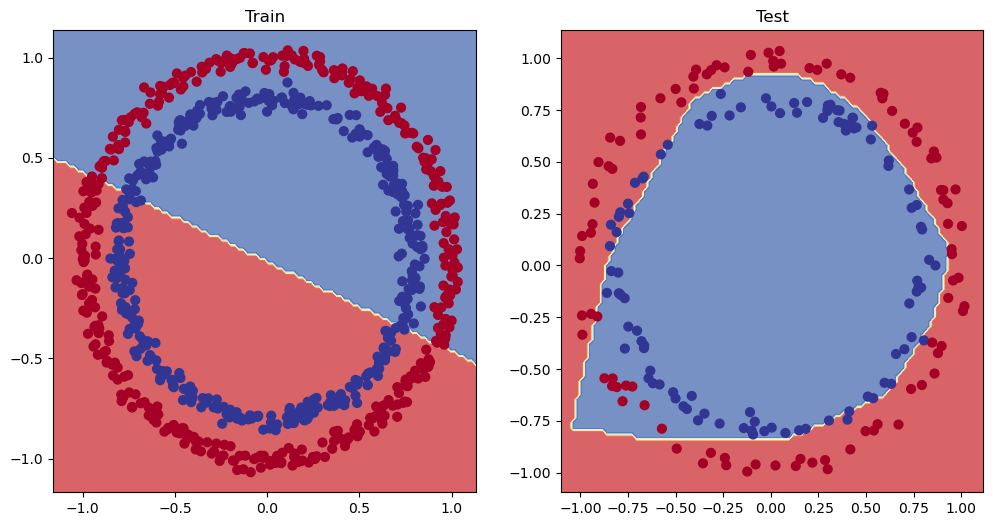

In [55]:
# Plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test, y_test) # model_3 = has non-linaearity

## Replicaing non-linear activation functions

Neaural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns in its own.

And these tools are linear & non-linear functions.

In [56]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [57]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

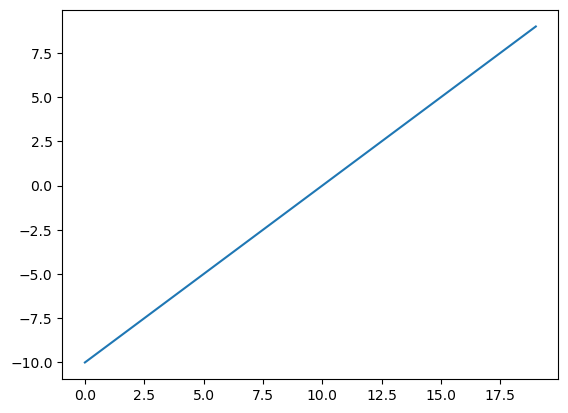

In [58]:
# visualize the tensor
plt.plot(A);

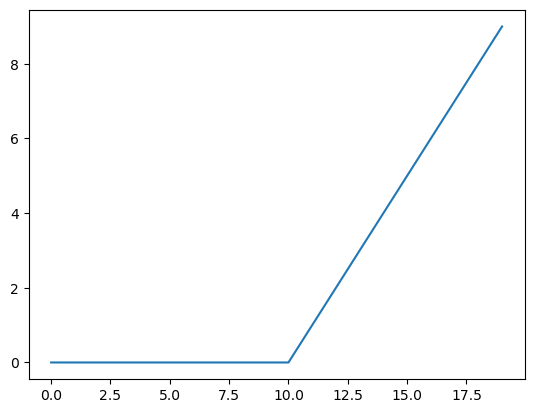

In [59]:
plt.plot(torch.relu(A));

In [60]:
def relu(x: torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0), x) # input must be tensor 
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

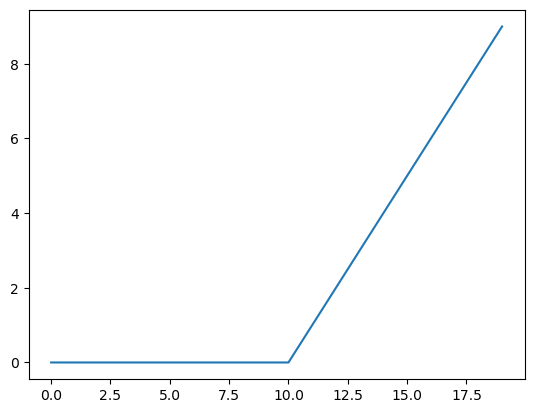

In [61]:
# plot Relu activation function 
plt.plot(relu(A));

In [62]:
# sigmoid 
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

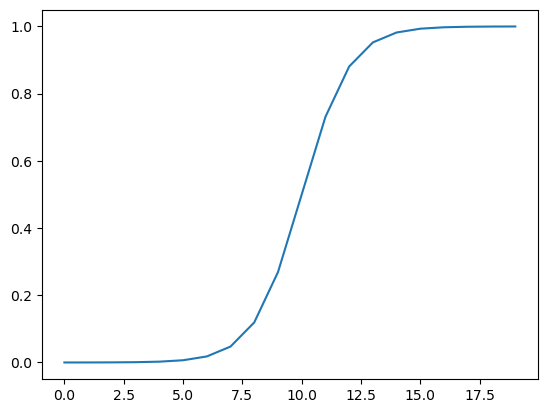

In [63]:
plt.plot(sigmoid(A));

# 8. Putting it all togeter with a multi-class classification problem

* Binary classication = one thing or another(cat vs. dog, spam, vs not spam, fraud or not fraud)

* Multi-class classifiction = more than ont thing or another (cat vs. dog vs. chicken)

## 8.1 Creating a toy multi-class dataset

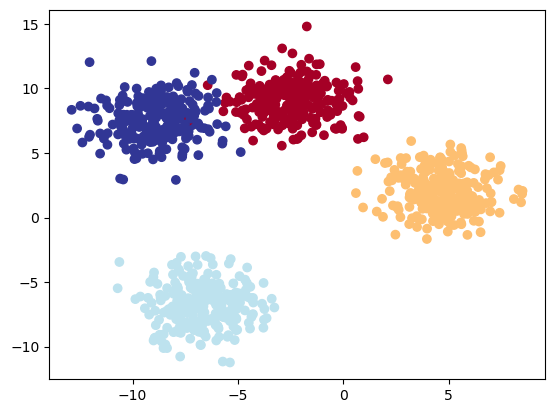

In [64]:
# import dependencies 
import torch
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set the hyperparameters for data creation 
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000, 
                           n_features=NUM_FEATURES,
                           centers=NUM_CLASSES,
                           cluster_std=1.5, # give the cluster a little shake up
                           random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, 
                                                                       y_blob, 
                                                                       test_size=0.2, 
                                                                       random_state=RANDOM_SEED)

## X_blob_train -> torch.Size([800, 2]), y_blob_train-> torch.Size([800] 


# 4. Plot data(visualize, visualize, visualize)
# plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu);

### 8.2 Building a multi-class classification model in Pytorch

In [65]:
# Create device agnostic code 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [66]:
# Build a multi-class classifiction model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.Linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features= hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features= output_features)
        )
    
    def forward(self, x):
        return self.Linear_layer_stack(x)
    
    
# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)
model_4

BlobModel(
  (Linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 loss function and optimizer 

In [67]:
# loss function and optimizer 
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification 
optimizer = torch.optim.SGD(params=model_4.parameters(), 
                           lr=0.1)

### 8.4 Getting prediction probabilities for a multi-class Pytorch model 

In order to evaluate and train and test our model, we need to convert our model's output(logtis) to prediction probabilities and then to prediction labels.

logits(raw output of the model) -> Pred probs(use 'torch.softmax') -> Pred label(take argmax of the predicion probabilites) 

In [68]:
# Let's get some raw output of our model (logits)
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))
y_logits

tensor([[-7.6459e-01, -7.4120e-01, -1.5777e+00, -1.1376e+00],
        [-9.7256e-02, -9.4310e-01, -5.9631e-01, -1.3715e-01],
        [ 2.5277e-01, -2.3794e-01,  1.8817e-01, -6.5686e-03],
        [-4.1340e-01, -5.2042e-01, -9.3033e-01, -6.9626e-01],
        [-3.1184e-01, -1.3736e+00, -1.1991e+00, -3.8337e-01],
        [-1.4971e-01, -1.0617e+00, -7.1069e-01, -1.6452e-01],
        [ 1.5388e-01, -2.8874e-01,  1.5199e-01, -1.0874e-02],
        [-2.1543e-01, -1.1795e+00, -9.3000e-01, -2.7448e-01],
        [ 2.4432e-01, -2.4716e-01,  1.6492e-01,  6.1044e-03],
        [-2.3286e-01, -1.2120e+00, -9.8487e-01, -3.0037e-01],
        [-1.7742e-01, -1.1008e+00, -8.2928e-01, -2.3689e-01],
        [-9.4082e-01, -7.8985e-01, -1.8480e+00, -1.3347e+00],
        [-2.9723e-01, -1.3458e+00, -1.1543e+00, -3.6287e-01],
        [-2.9006e-01, -1.3393e+00, -1.1146e+00, -3.3518e-01],
        [-3.3713e-01, -1.4374e+00, -1.2379e+00, -3.8029e-01],
        [-1.0260e-01, -9.5066e-01, -6.1913e-01, -1.5105e-01],
        

In [69]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [70]:
# Convert our model's logits to predicion probabilities 
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [71]:
print(torch.sum(y_pred_probs[0])) # sum of first row 
print(torch.max(y_pred_probs[0])) # maximum value of first raw
print(torch.argmax(y_pred_probs[0])) # index value of maximum probs

tensor(1.)
tensor(0.3244)
tensor(1)


In [72]:
# convert our model's prediction probabilites to prdiction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [73]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Creating a training loop and testing loop for multi-class PyTorch model 

In [74]:
# Fit the multi-class model to the data 
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set number of epochs
epochs = 100

# put data to the target device (device agnostic code)
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data 
for epoch in range(epochs):
    ### Training 
    model_4.train()
    
    # Forward pass
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  
    # calculate loss
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                     y_pred=y_pred)
    
    # optimizer zero grad
    optimizer.zero_grad()
    
    # loss backward
    loss.backward()
    
    # optimizer step 
    optimizer.step()
    
    ### Testing 
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
        
#         print(test_logits.shape, y_blob_test.shape)
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true= y_blob_test,
                              y_pred=test_preds)
        
    # Print out what's happenin'
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.1588, Acc: 40.38% | Test loss: 1.0755, Test Acc: 48.00%
Epoch: 10 | Loss: 0.6448, Acc: 96.75% | Test loss: 0.6607, Test Acc: 97.50%
Epoch: 20 | Loss: 0.4254, Acc: 98.50% | Test loss: 0.4307, Test Acc: 100.00%
Epoch: 30 | Loss: 0.2529, Acc: 99.12% | Test loss: 0.2451, Test Acc: 99.50%
Epoch: 40 | Loss: 0.1123, Acc: 99.25% | Test loss: 0.1023, Test Acc: 99.50%
Epoch: 50 | Loss: 0.0663, Acc: 99.25% | Test loss: 0.0585, Test Acc: 99.50%
Epoch: 60 | Loss: 0.0507, Acc: 99.25% | Test loss: 0.0429, Test Acc: 99.50%
Epoch: 70 | Loss: 0.0430, Acc: 99.25% | Test loss: 0.0349, Test Acc: 99.50%
Epoch: 80 | Loss: 0.0384, Acc: 99.25% | Test loss: 0.0299, Test Acc: 99.50%
Epoch: 90 | Loss: 0.0352, Acc: 99.25% | Test loss: 0.0266, Test Acc: 99.50%


### 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [75]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
    
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [76]:
# Go from logits-> prediction probabilites
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.3438e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1074e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [77]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [78]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

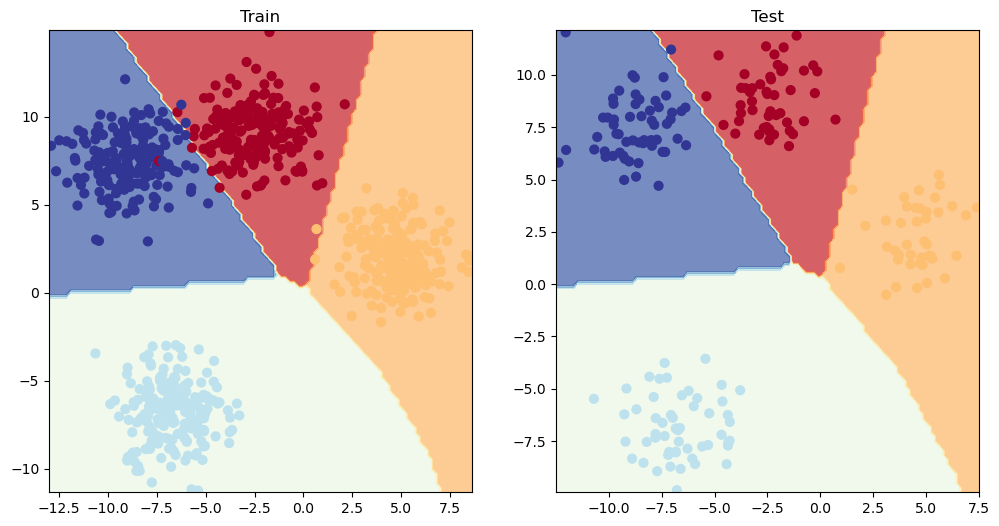

In [79]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

#  --------Extra--------- 

## 9 A few more classification metrics... (to evaluate our classification model)

* Accuracy 
* Precision
* Recall 
* F1-score
* Confusion matrix
* Classification report 

In [86]:
from torchmetrics import Accuracy

# Set-up metric
torchmetic_accuracy = Accuracy()

# Calculate accuracy
torchmetic_accuracy(y_preds, y_blob_test)

tensor(0.9950)

## Exercises & Extra-curriculum 

See exercises and extra-curriculum here: www.learnpytorch.io 